In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\tc\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_ASEAN = df[(df['job_country'].isin(ASEAN)) & (df['job_title'] == 'Data Analyst')].copy()
df_ASEAN['job_posted_month'] = df_ASEAN['job_posted_date'].dt.month
df_ASEAN_explode = df_ASEAN.explode('job_skills')

In [3]:
df_ASEAN_pivot = df_ASEAN_explode.pivot_table(index='job_posted_month',columns='job_skills', aggfunc='size', fill_value=0)

df_ASEAN_pivot


job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asp.net,assembly,atlassian,...,visio,visual basic,vmware,vue,watson,windows,wire,word,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,2,1,4,1,0,1,0,0,0,0,...,2,6,0,0,0,9,0,14,1,0
2,2,0,4,2,0,0,2,0,0,0,...,0,1,0,0,0,2,0,13,1,2
3,0,0,4,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,15,0,0
4,0,0,3,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,17,0,1
5,1,0,5,0,0,0,0,0,0,0,...,1,0,0,1,0,3,0,7,0,0
6,3,1,6,0,0,0,0,1,0,1,...,0,4,0,0,0,2,0,28,1,1
7,1,0,3,0,0,0,1,0,0,0,...,0,1,0,0,0,8,0,27,0,0
8,4,0,1,0,0,0,0,0,1,0,...,0,2,0,0,0,4,0,25,2,0
9,0,1,3,0,0,0,0,1,0,0,...,0,1,0,0,1,2,0,11,0,1


In [4]:
df_ASEAN_pivot.loc['Total'] = df_ASEAN_pivot.sum()

df_ASEAN_pivot = df_ASEAN_pivot[df_ASEAN_pivot.loc['Total'].sort_values(ascending=False).index]
df_ASEAN_pivot = df_ASEAN_pivot.drop('Total')

df_ASEAN_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,aws,powerpoint,word,...,unity,monday.com,typescript,trello,theano,clickup,phoenix,datarobot,node.js,rust
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,245,179,172,150,114,70,64,33,16,14,...,0,0,1,0,0,0,0,0,0,0
2,132,109,91,83,56,51,34,12,20,13,...,0,0,0,0,0,0,0,0,0,0
3,173,126,123,115,73,56,44,12,20,15,...,1,0,0,0,0,0,0,0,0,0
4,141,106,126,79,51,47,38,11,16,17,...,0,0,0,0,0,0,0,0,1,0
5,158,128,107,84,56,68,38,19,16,7,...,0,0,0,0,0,0,0,0,0,0
6,198,140,135,116,75,64,44,38,23,28,...,0,0,0,0,1,1,0,0,0,1
7,202,154,139,114,87,80,48,28,12,27,...,0,0,0,1,0,0,0,0,0,0
8,186,139,140,119,95,59,44,24,16,25,...,0,0,0,0,0,0,0,1,0,0
9,134,99,95,92,69,46,30,12,13,11,...,0,0,0,0,0,0,0,0,0,0


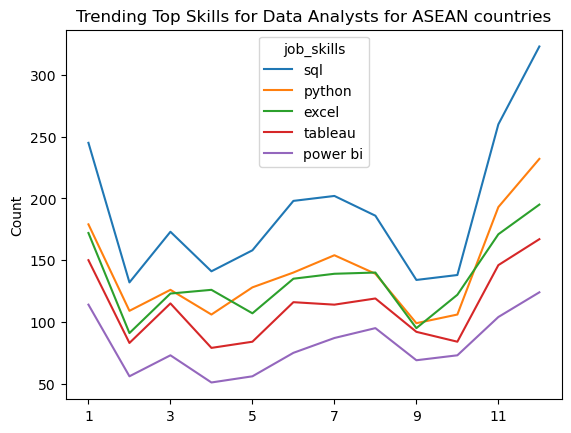

In [5]:
df_ASEAN_pivot.iloc[:,:5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts for ASEAN countries')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [6]:
df_DA = df_ASEAN.groupby('job_posted_month').size().copy()

df_DA

job_posted_month
1     458
2     255
3     295
4     269
5     281
6     326
7     346
8     345
9     245
10    296
11    518
12    555
dtype: int64

In [7]:
df_DA_ASEAN_per = df_ASEAN_pivot.iloc[:12].div(df_DA/100, axis=0)

df_DA_ASEAN_per = df_DA_ASEAN_per.reset_index()
df_DA_ASEAN_per['job_posted_month'] = df_DA_ASEAN_per['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_ASEAN_per = df_DA_ASEAN_per.set_index('job_posted_month')
df_DA_ASEAN_per

job_skills,sql,python,excel,tableau,power bi,r,sas,aws,powerpoint,word,...,unity,monday.com,typescript,trello,theano,clickup,phoenix,datarobot,node.js,rust
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,53.493450,39.082969,37.554585,32.751092,24.890830,15.283843,13.973799,7.205240,3.493450,3.056769,...,0.000000,0.000000,0.218341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.764706,42.745098,35.686275,32.549020,21.960784,20.000000,13.333333,4.705882,7.843137,5.098039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.644068,42.711864,41.694915,38.983051,24.745763,18.983051,14.915254,4.067797,6.779661,5.084746,...,0.338983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,52.416357,39.405204,46.840149,29.368030,18.959108,17.472119,14.126394,4.089219,5.947955,6.319703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371747,0.000000
May,56.227758,45.551601,38.078292,29.893238,19.928826,24.199288,13.523132,6.761566,5.693950,2.491103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,60.736196,42.944785,41.411043,35.582822,23.006135,19.631902,13.496933,11.656442,7.055215,8.588957,...,0.000000,0.000000,0.000000,0.000000,0.306748,0.306748,0.000000,0.000000,0.000000,0.306748
Jul,58.381503,44.508671,40.173410,32.947977,25.144509,23.121387,13.872832,8.092486,3.468208,7.803468,...,0.000000,0.000000,0.000000,0.289017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,53.913043,40.289855,40.579710,34.492754,27.536232,17.101449,12.753623,6.956522,4.637681,7.246377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.289855,0.000000,0.000000
Sep,54.693878,40.408163,38.775510,37.551020,28.163265,18.775510,12.244898,4.897959,5.306122,4.489796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_test = df_DA_ASEAN_per.iloc[:,:5]
df_test.iloc[-1,1]

41.8018018018018

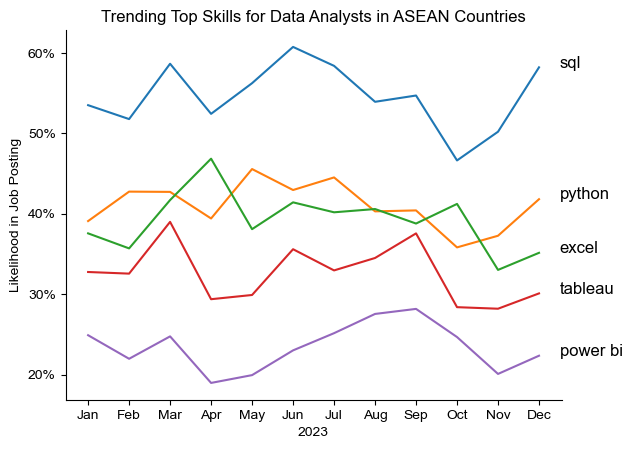

In [9]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_ASEAN_per.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.legend().remove()
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Posting')
plt.title('Trending Top Skills for Data Analysts in ASEAN Countries')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.5, df_plot.iloc[-1,i], df_plot.columns[i], color='black')
plt.show()